In [1]:
from google.colab import files
uploaded = files.upload()


Saving project.zip to project.zip


In [2]:
import zipfile
import os

zip_path = "/content/project.zip"
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Archivos extraídos correctamente.")


✅ Archivos extraídos correctamente.


In [3]:
import shutil
from sklearn.model_selection import train_test_split

# Rutas
images_path = "content/masked_data"
labels_path = "content/yolo_labels"

# Crear carpetas destino
for split in ["train", "val"]:
    os.makedirs(f"/content/dataset/images/{split}", exist_ok=True)
    os.makedirs(f"/content/dataset/labels/{split}", exist_ok=True)

# Obtener archivos
images = sorted([f for f in os.listdir(images_path) if f.endswith(".png")])
labels = sorted([f.replace(".png", ".txt") for f in images])

# Crear rutas completas
image_paths = [os.path.join(images_path, img) for img in images]
label_paths = [os.path.join(labels_path, lbl) for lbl in labels]

# Split 80/20
train_imgs, val_imgs, train_lbls, val_lbls = train_test_split(
    image_paths, label_paths, test_size=0.2, random_state=42
)

# Función para copiar a la estructura YOLO
def copy_to_yolo_structure(imgs, lbls, split):
    for img_path, lbl_path in zip(imgs, lbls):
        shutil.copy(img_path, f"/content/dataset/images/{split}/")
        shutil.copy(lbl_path, f"/content/dataset/labels/{split}/")

# Copiar
copy_to_yolo_structure(train_imgs, train_lbls, "train")
copy_to_yolo_structure(val_imgs, val_lbls, "val")


In [4]:
import os

labels_path = '/content/dataset/labels/train'  # cambia si tus etiquetas están en otro sitio

all_classes = set()

# Recorre todos los archivos .txt en la carpeta de etiquetas
for file_name in os.listdir(labels_path):
    if file_name.endswith('.txt'):
        with open(os.path.join(labels_path, file_name), 'r') as f:
            for line in f:
                class_id = int(line.strip().split()[0])  # el primer número es la clase
                all_classes.add(class_id)

# Mostrar resultados
sorted_classes = sorted(list(all_classes))
print(f"✅ Número total de clases: {len(sorted_classes)}")
print(f"🏷️ Clases detectadas: {sorted_classes}")


✅ Número total de clases: 2
🏷️ Clases detectadas: [0, 1]


In [30]:
%cd yolov5

/content/yolov5


In [5]:
%%writefile /content/data.yaml
train: /content/dataset/images/train
val: /content/dataset/images/val

nc: 2
names: ['clase0', 'clase1']


Writing /content/data.yaml


In [6]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17360, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 17360 (delta 36), reused 18 (delta 18), pack-reused 17308 (from 2)
Receiving objects: 100% (17360/17360), 16.23 MiB | 17.10 MiB/s, done.
Resolving deltas: 100% (11898/11898), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s 

In [7]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/data.yaml --weights yolov5s.pt --name gotas_yolo


Se han truncado las últimas 5000 líneas del flujo de salida.
  with torch.cuda.amp.autocast(amp):
      40/49      1.91G   0.004993   0.005973  0.0001663         75        416:  12% 31/250 [00:10<01:33,  2.35it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      40/49      1.91G    0.00498   0.005975  0.0001687         76        416:  13% 32/250 [00:11<01:55,  1.89it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      40/49      1.91G   0.004967   0.006036  0.0001684         81        416:  13% 33/250 [00:11<01:35,  2.28it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.au

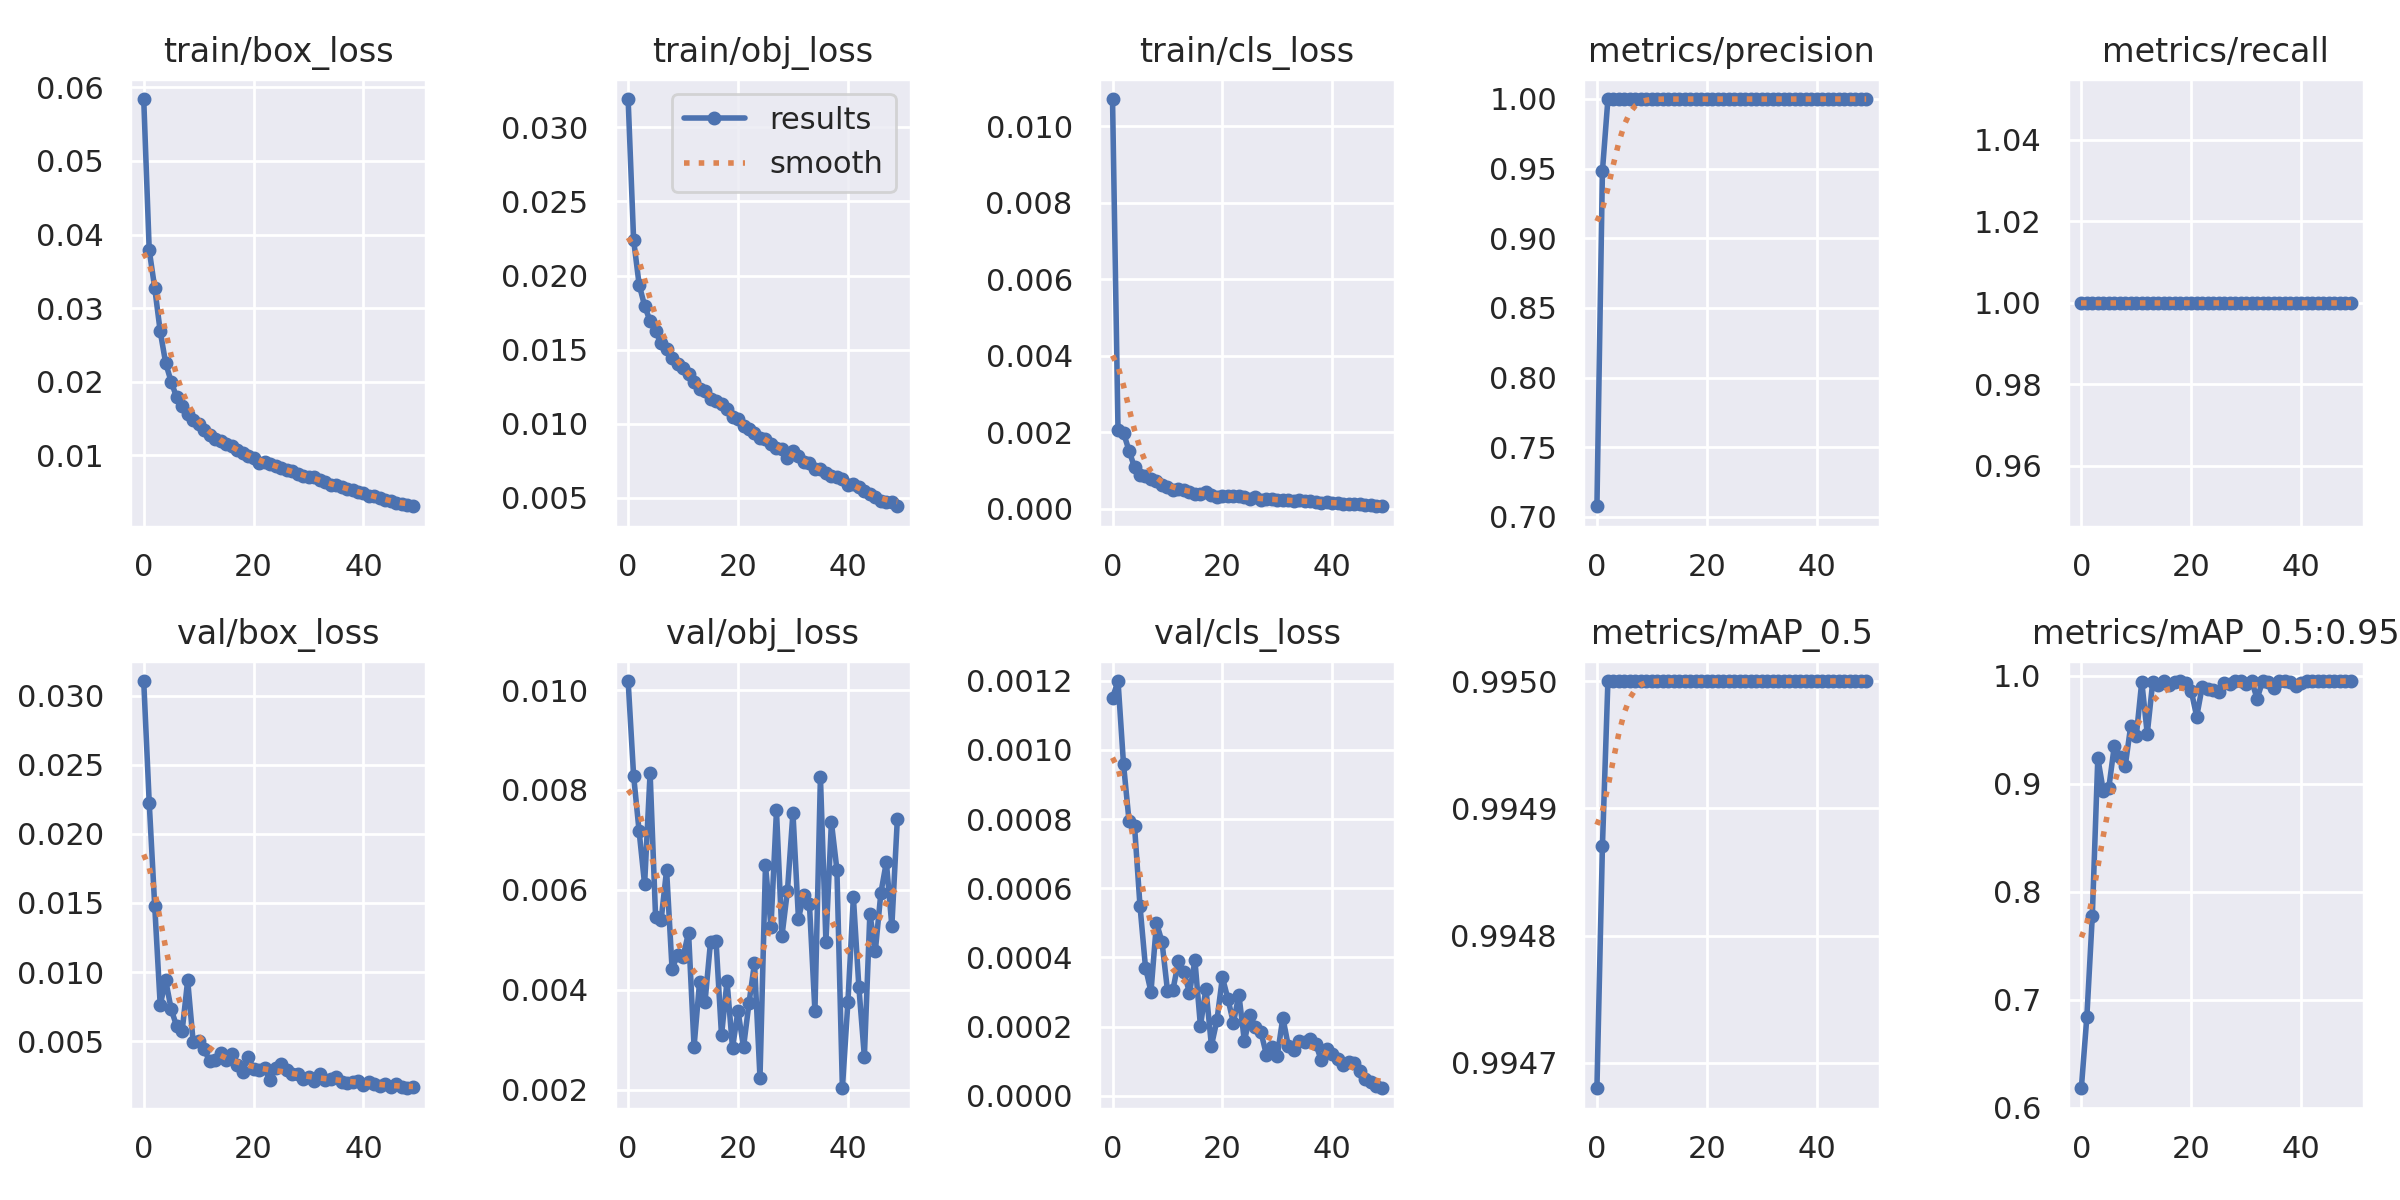

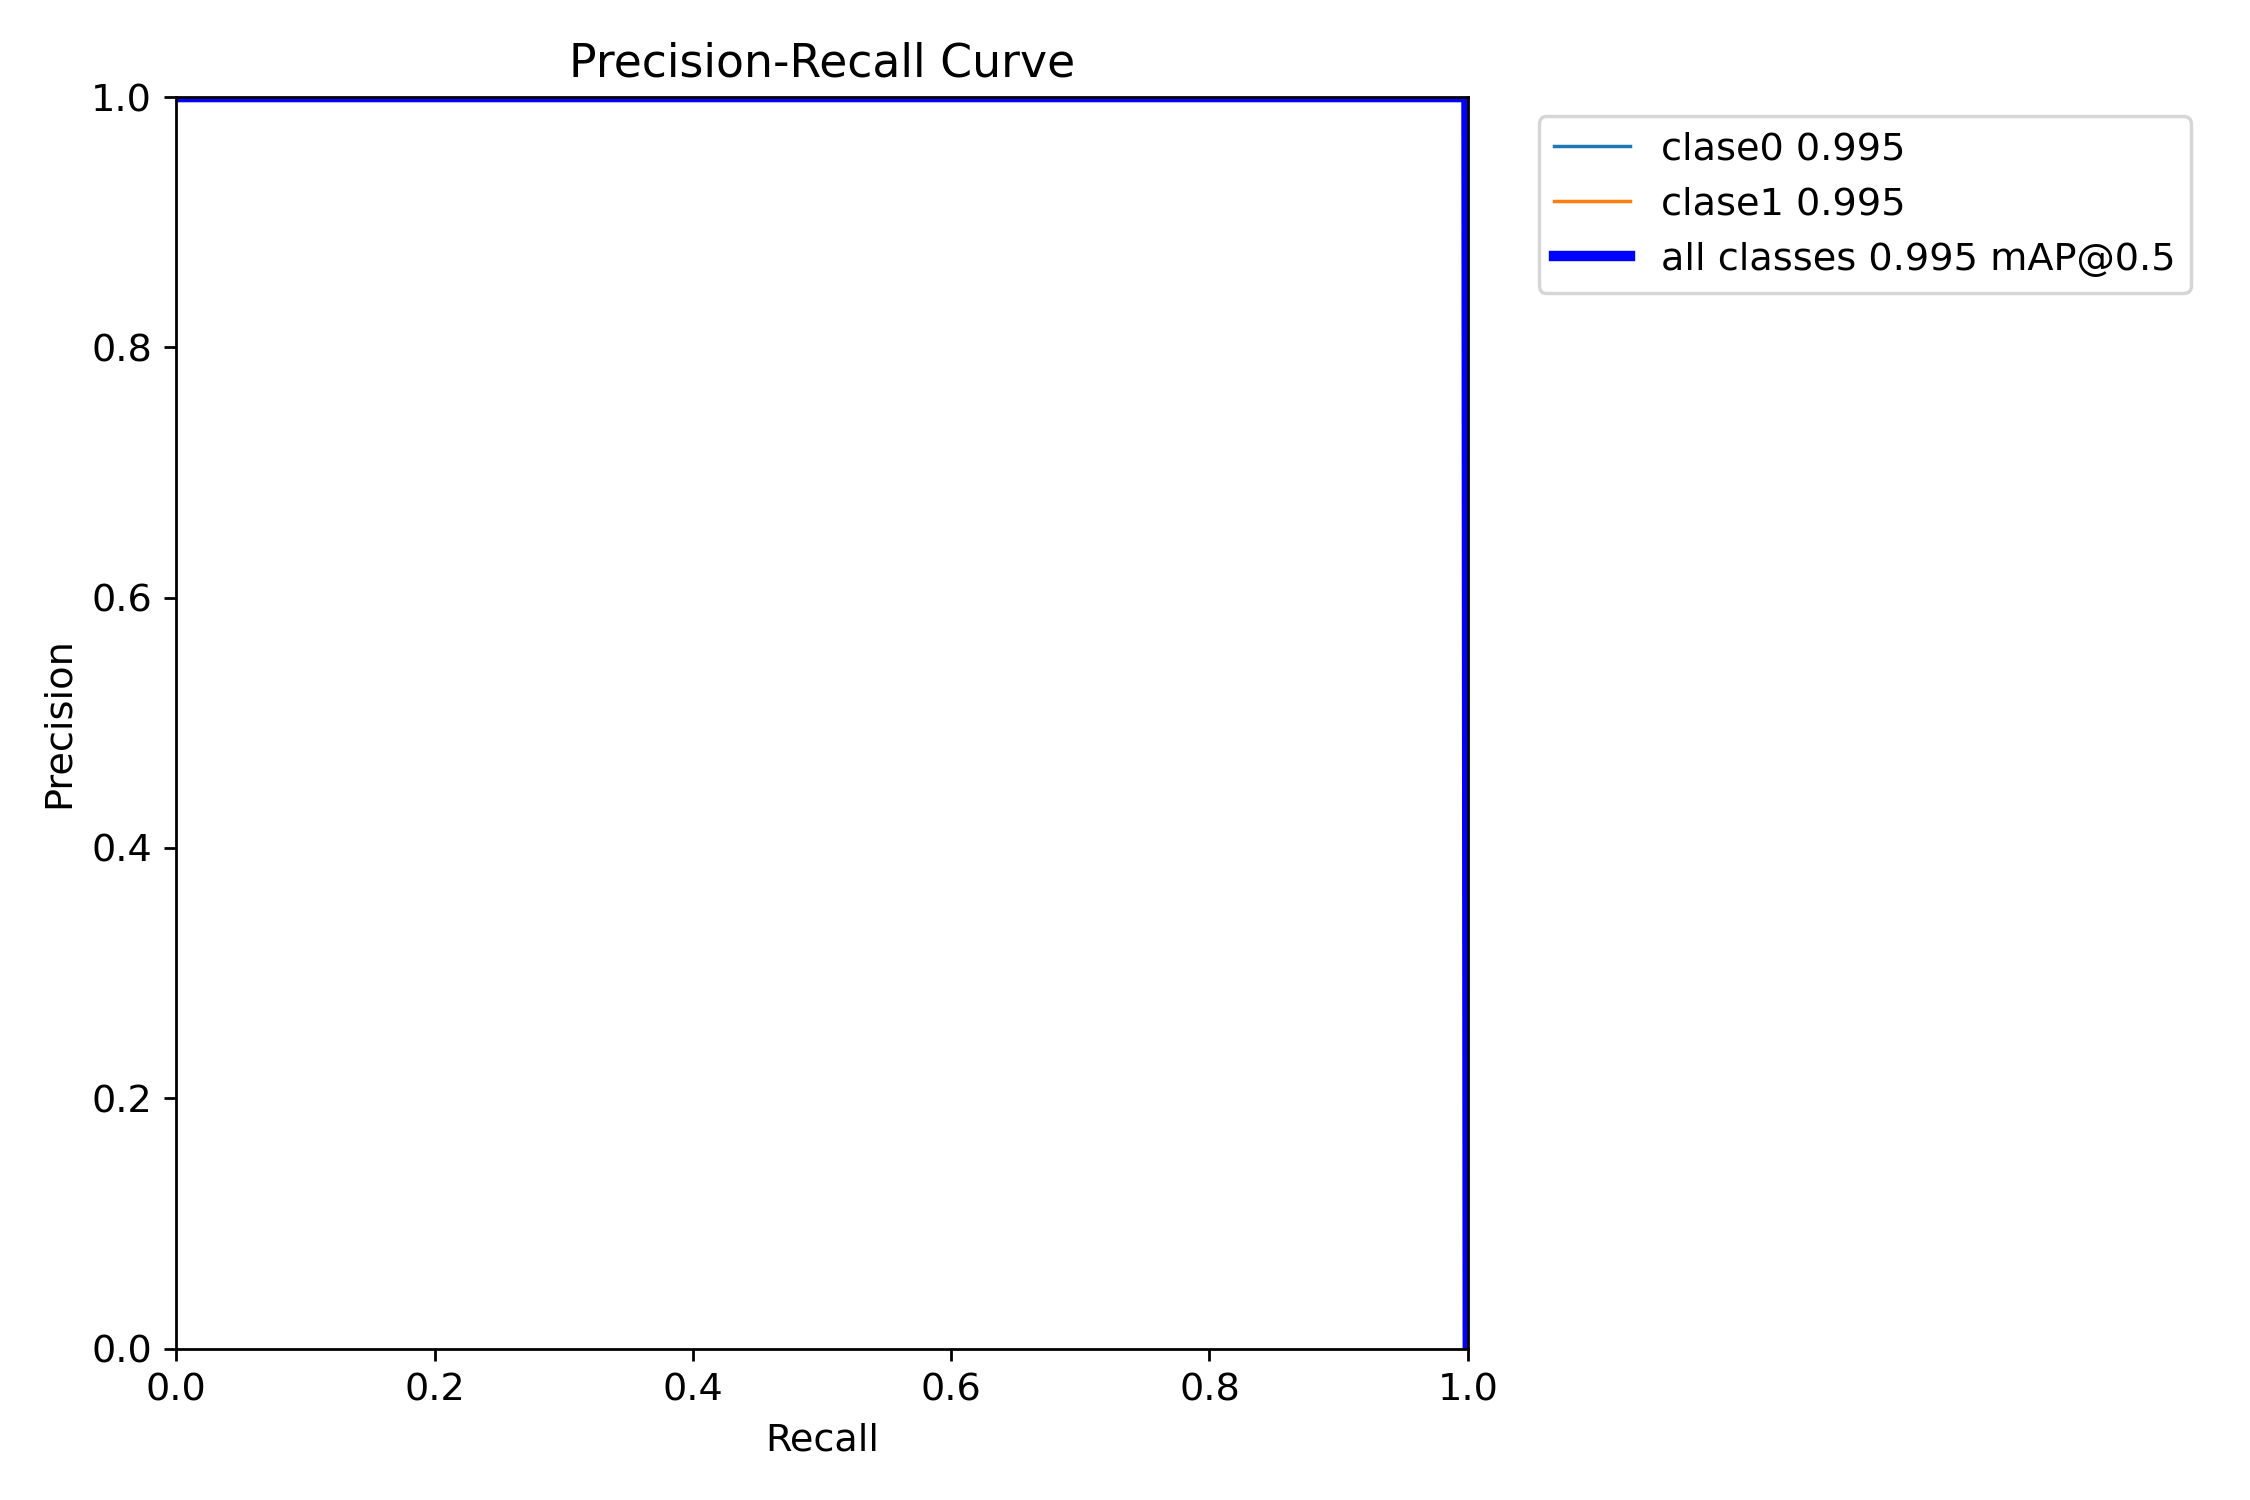

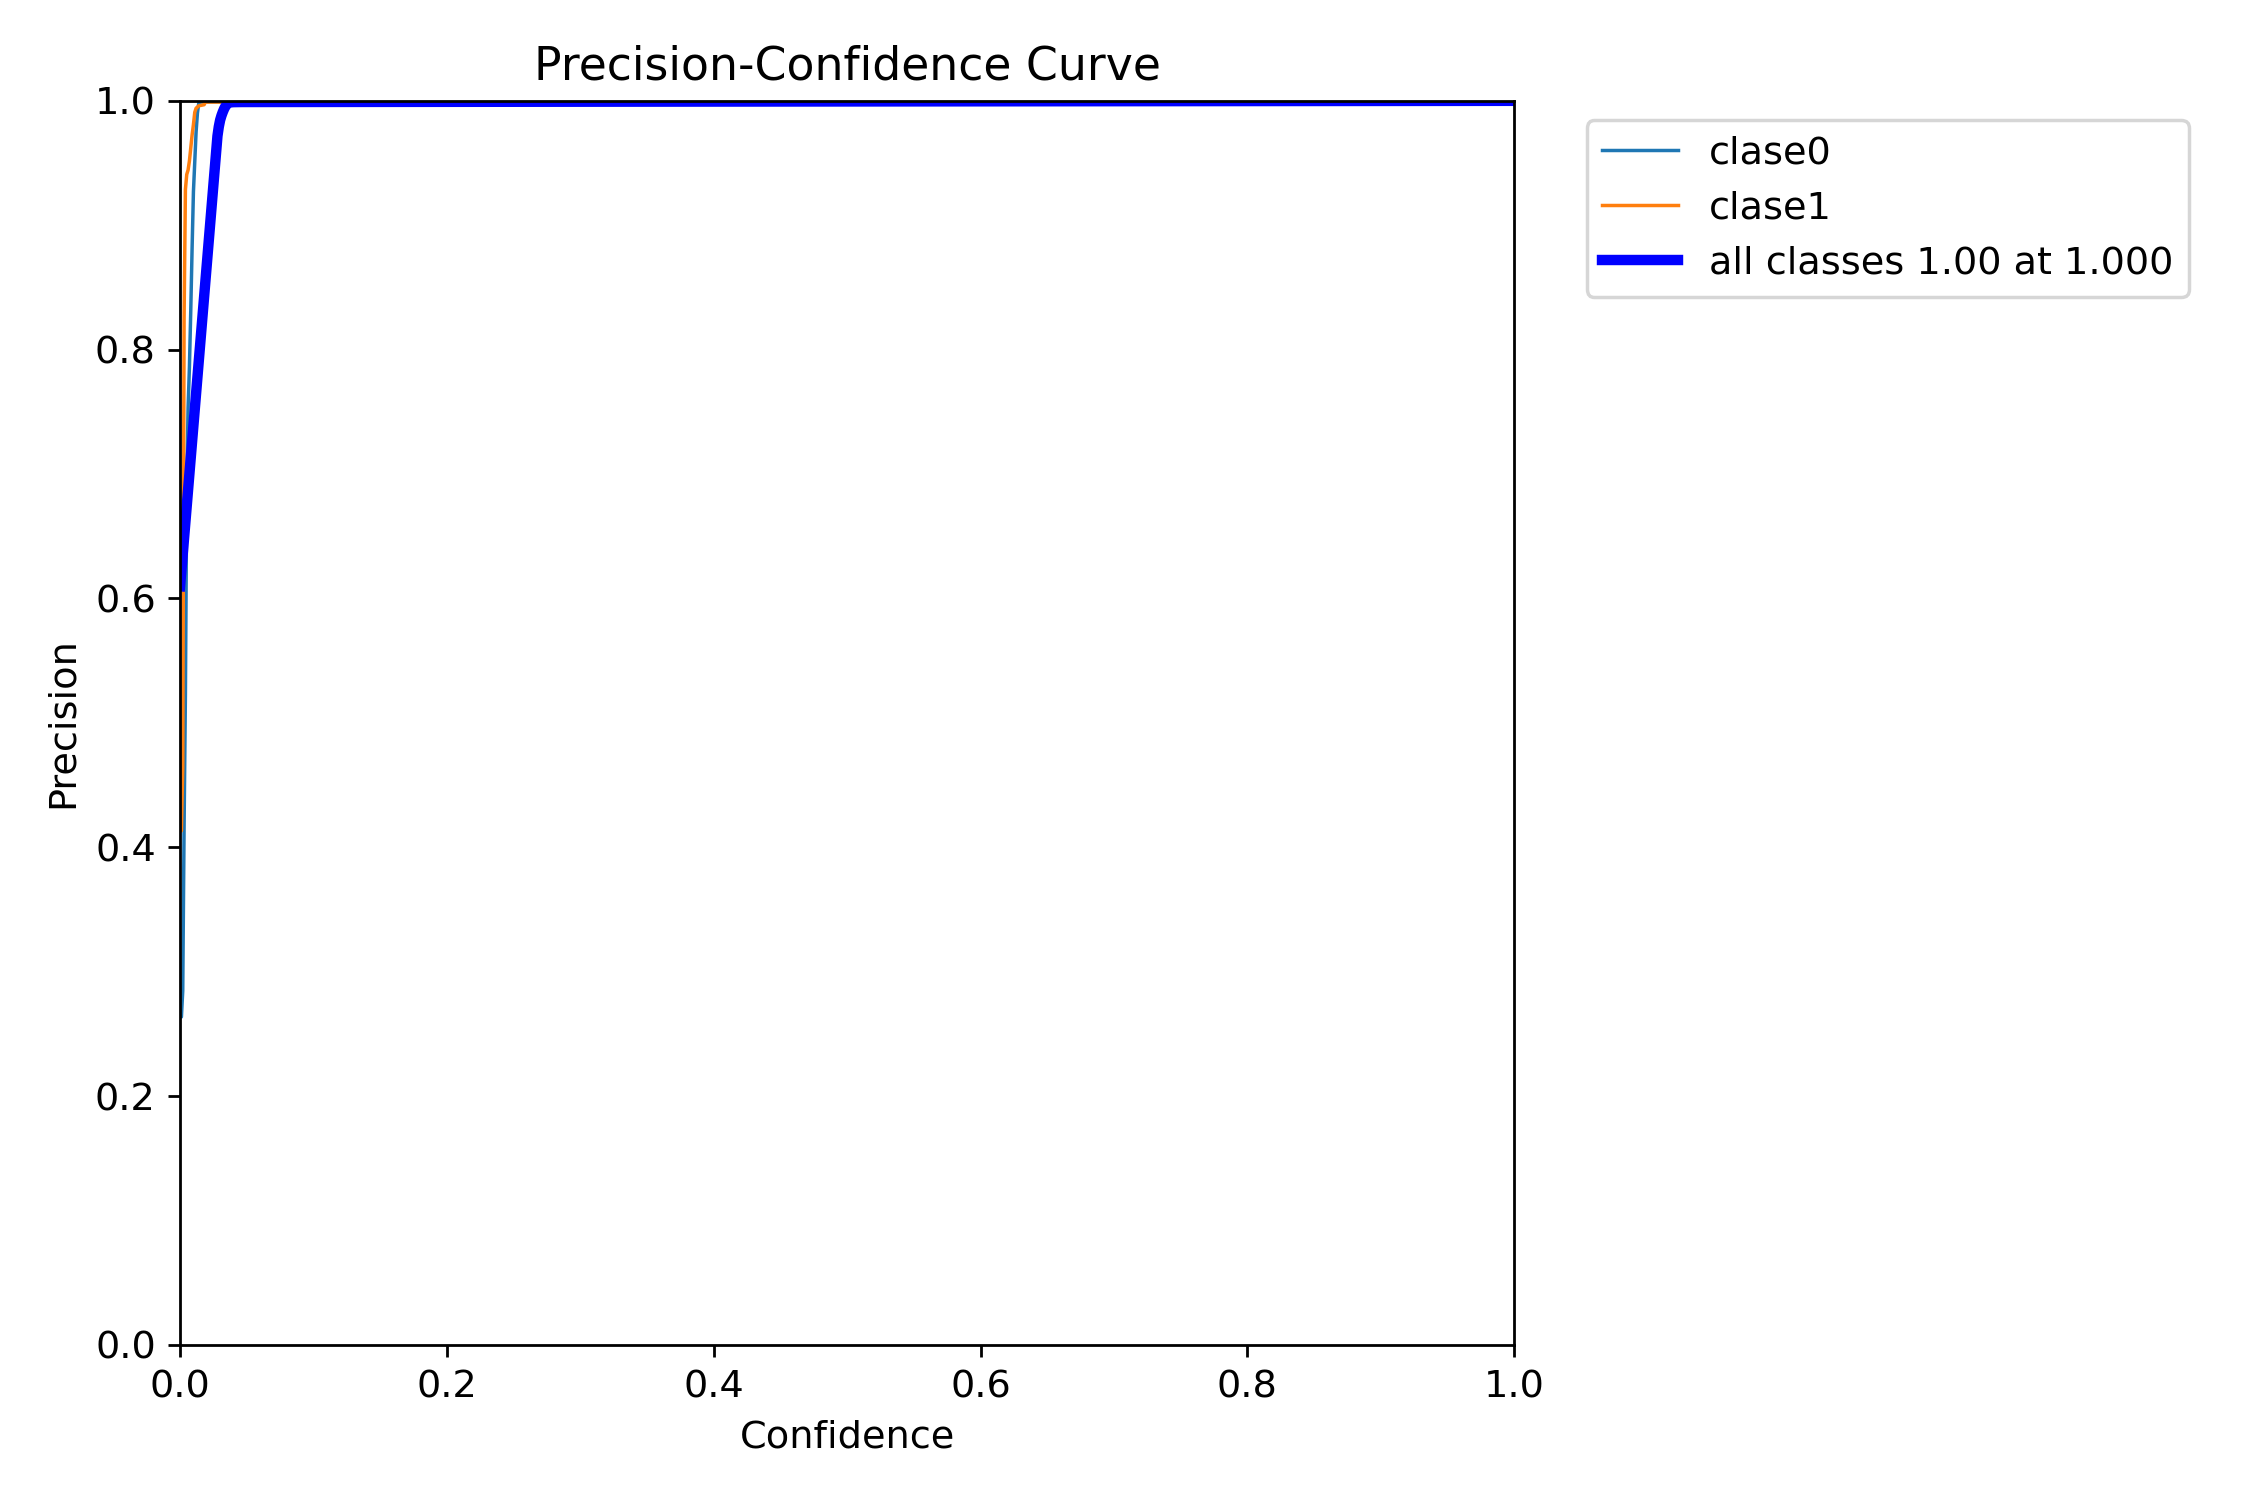

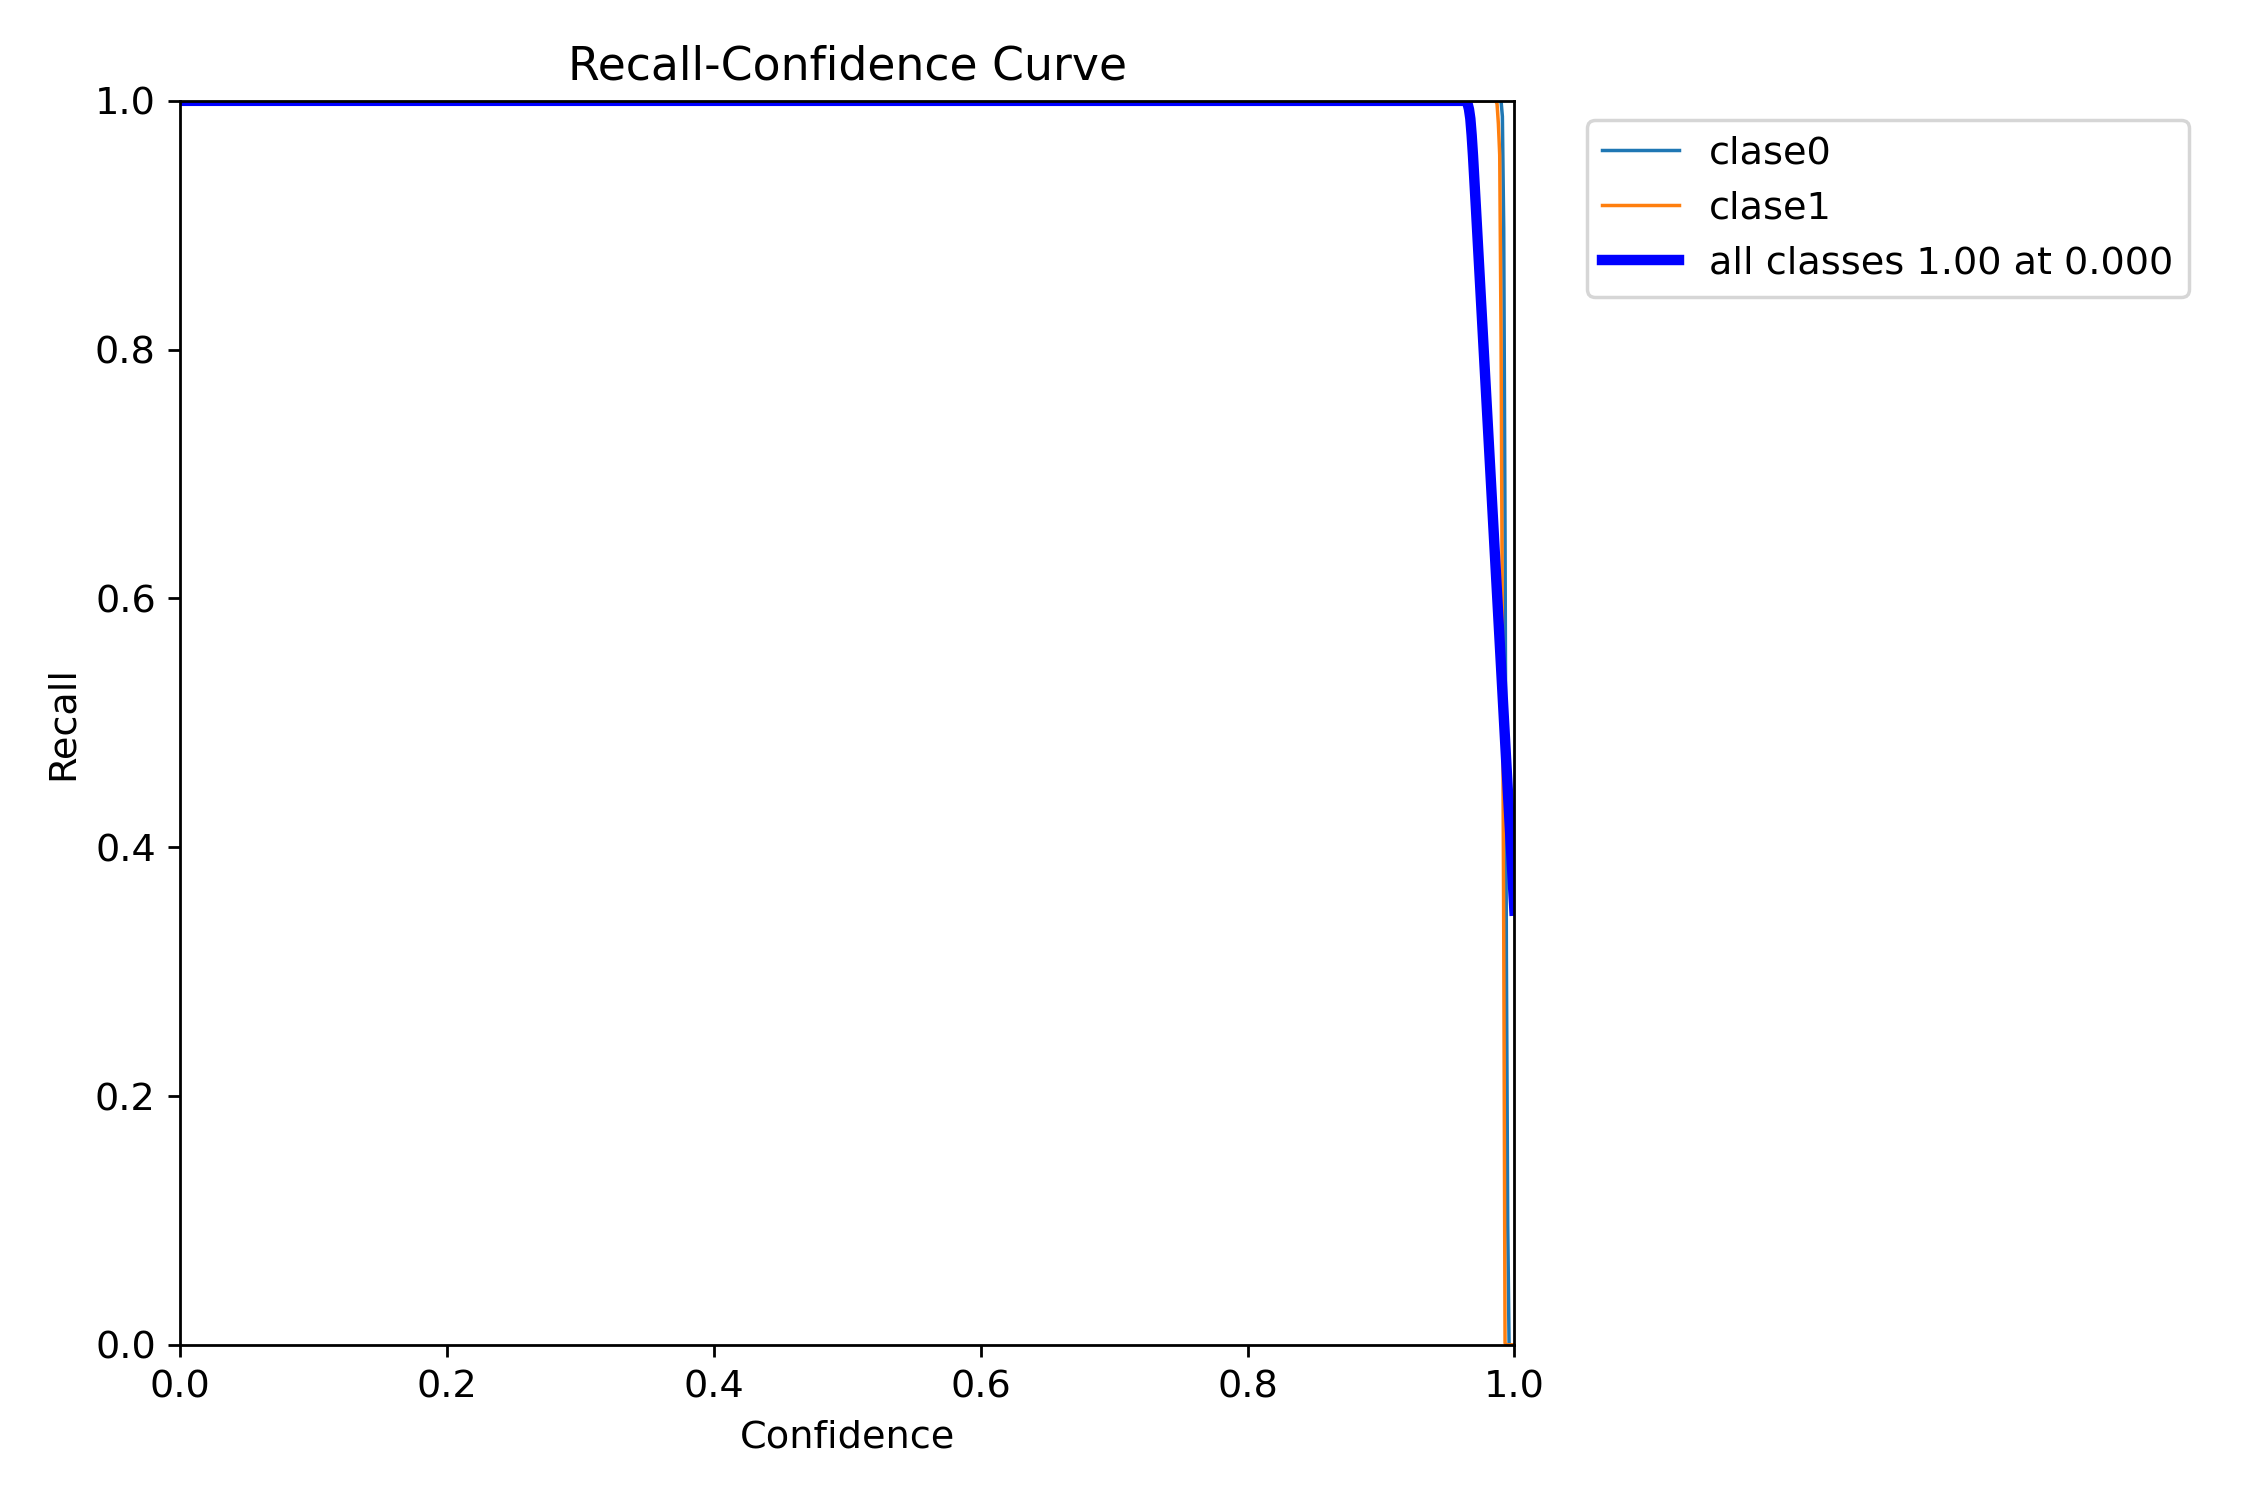

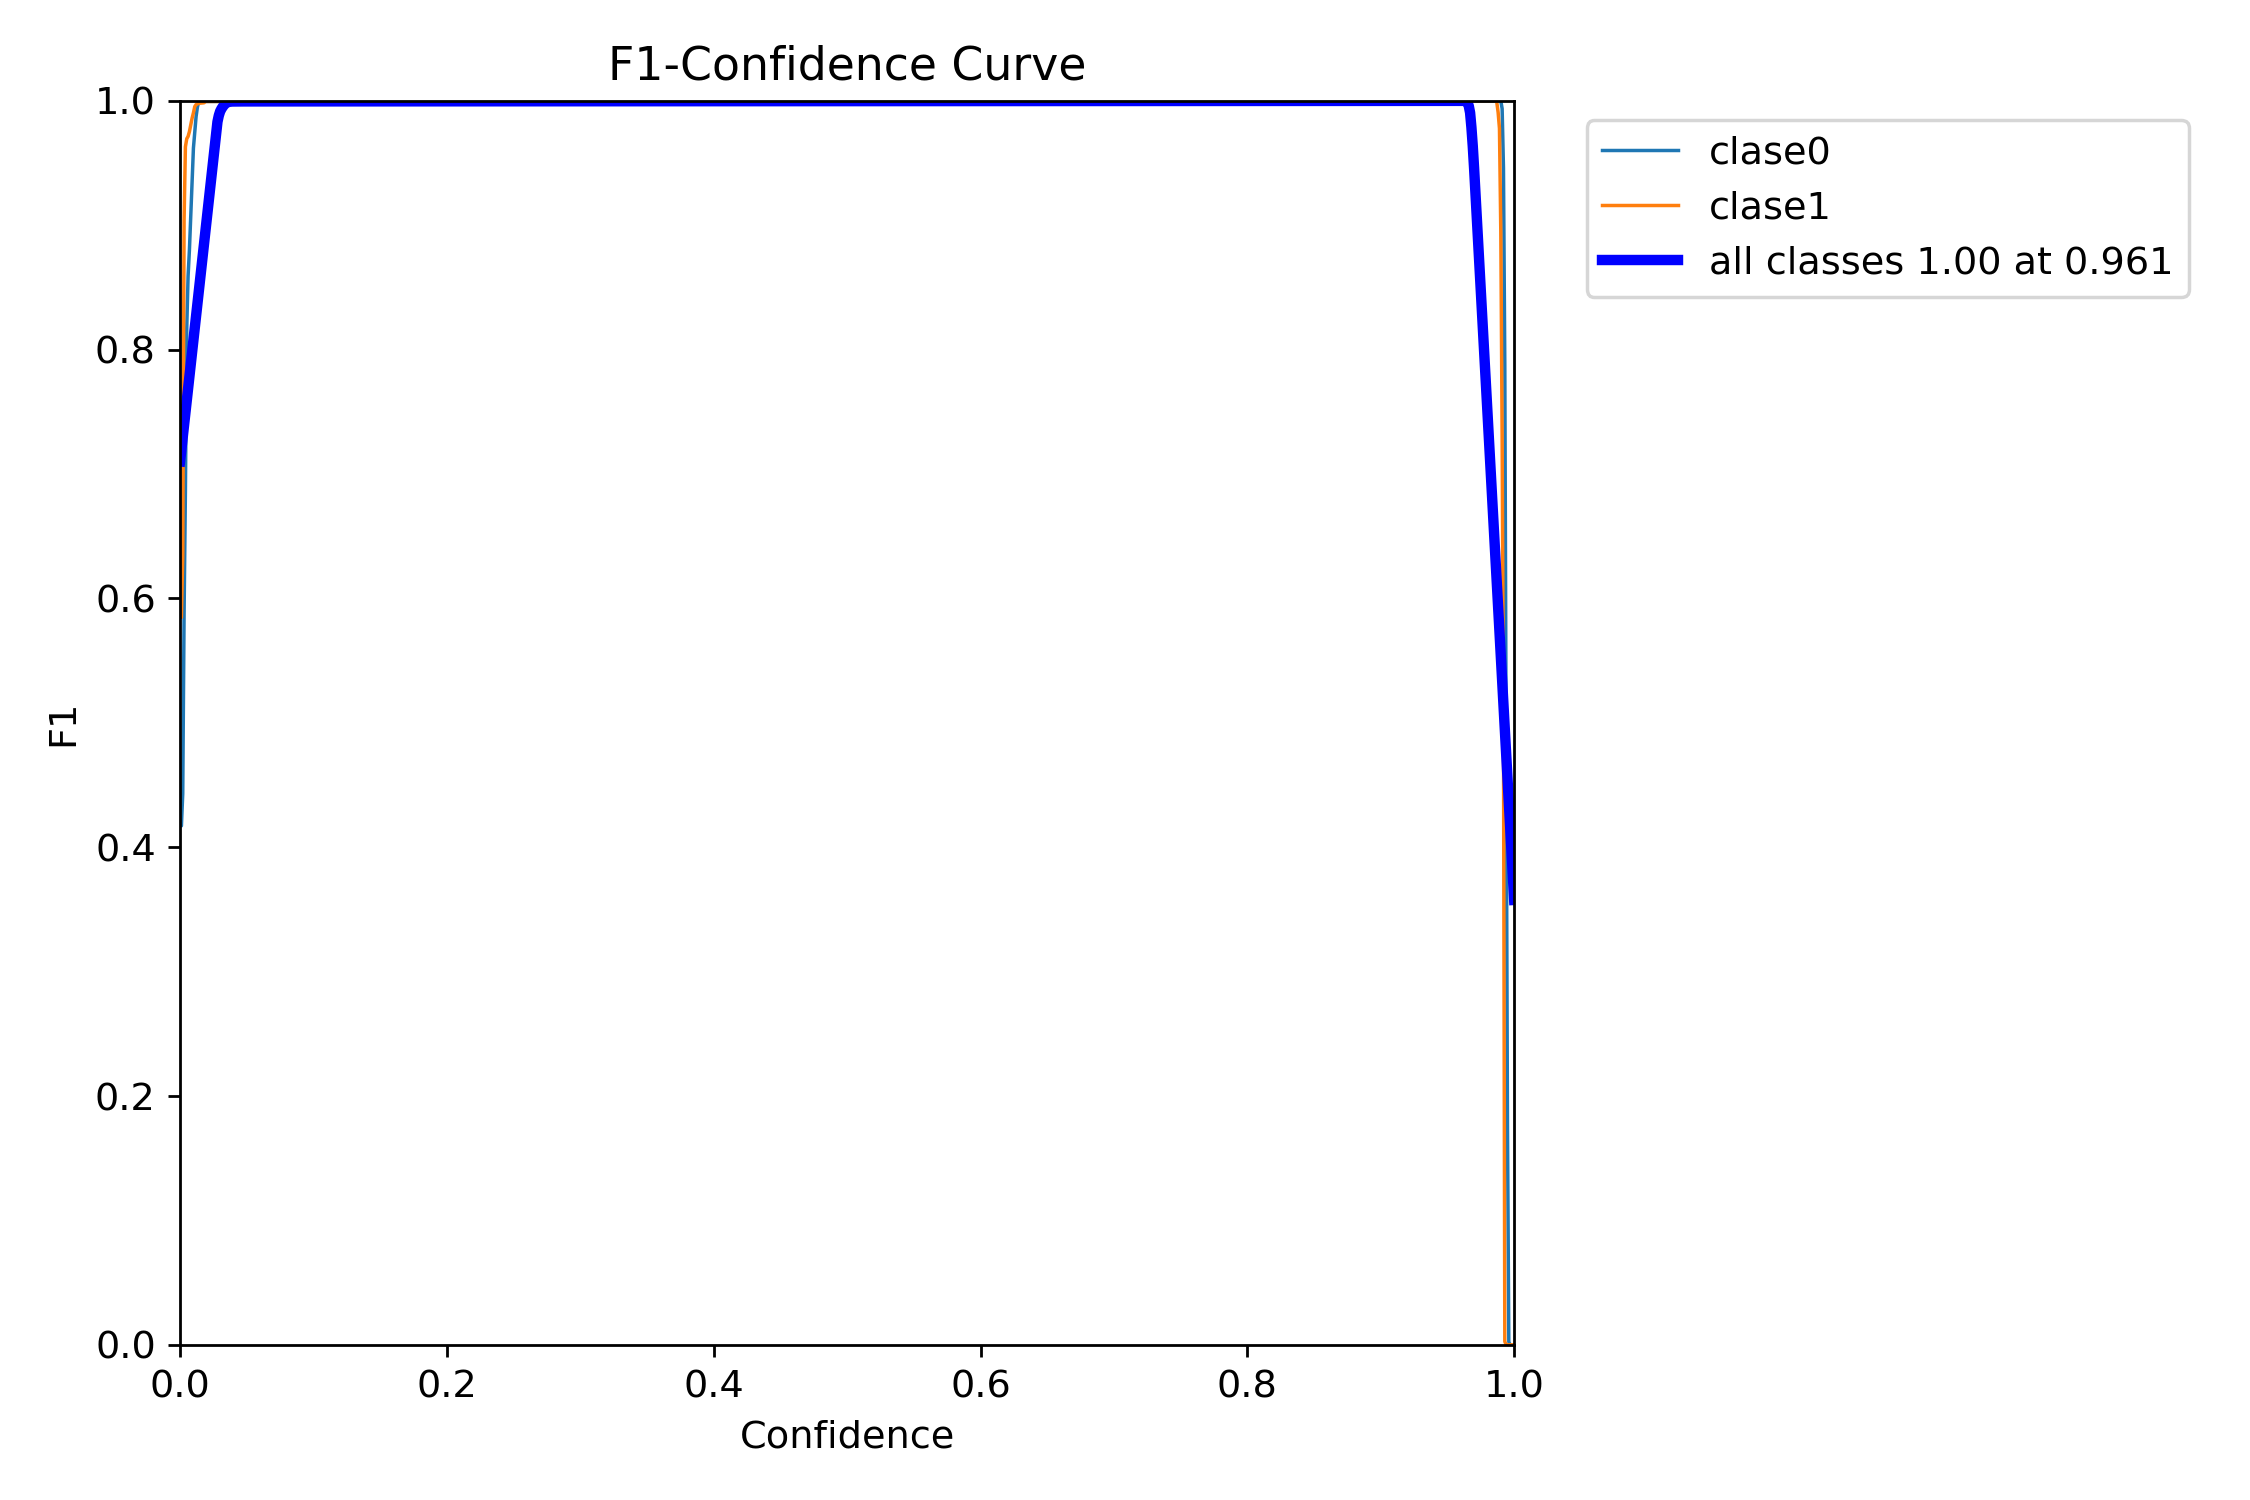

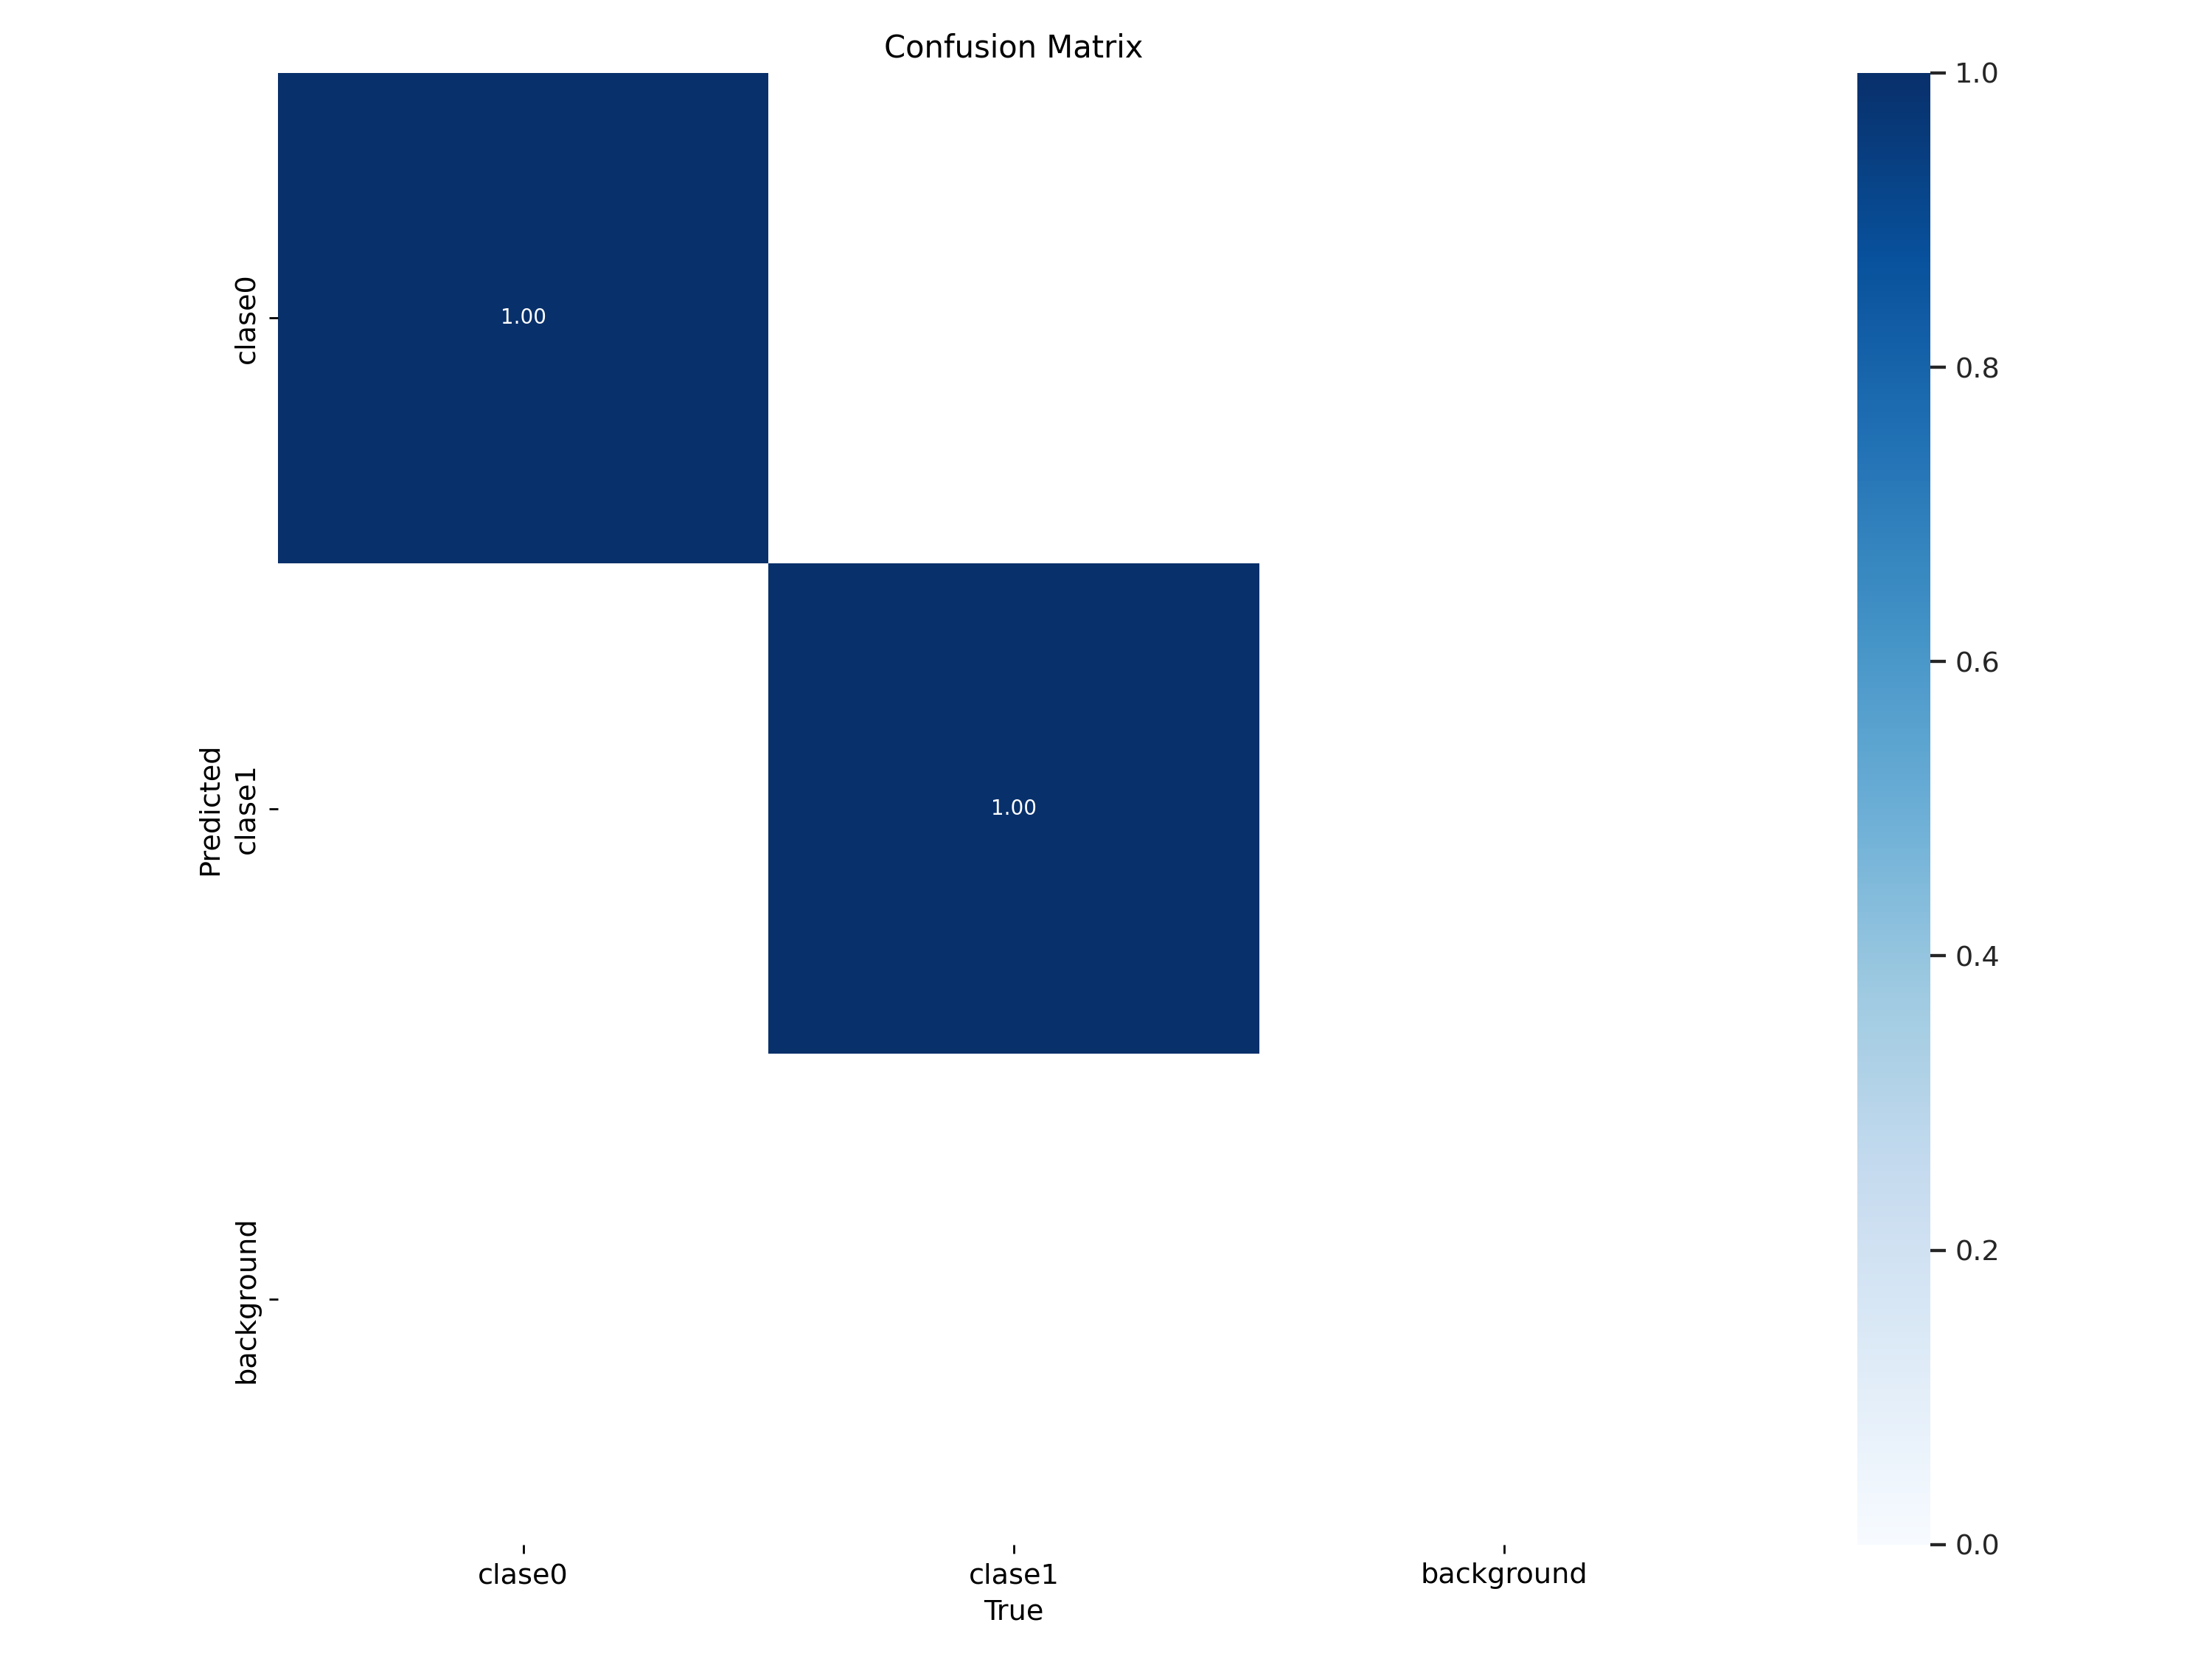

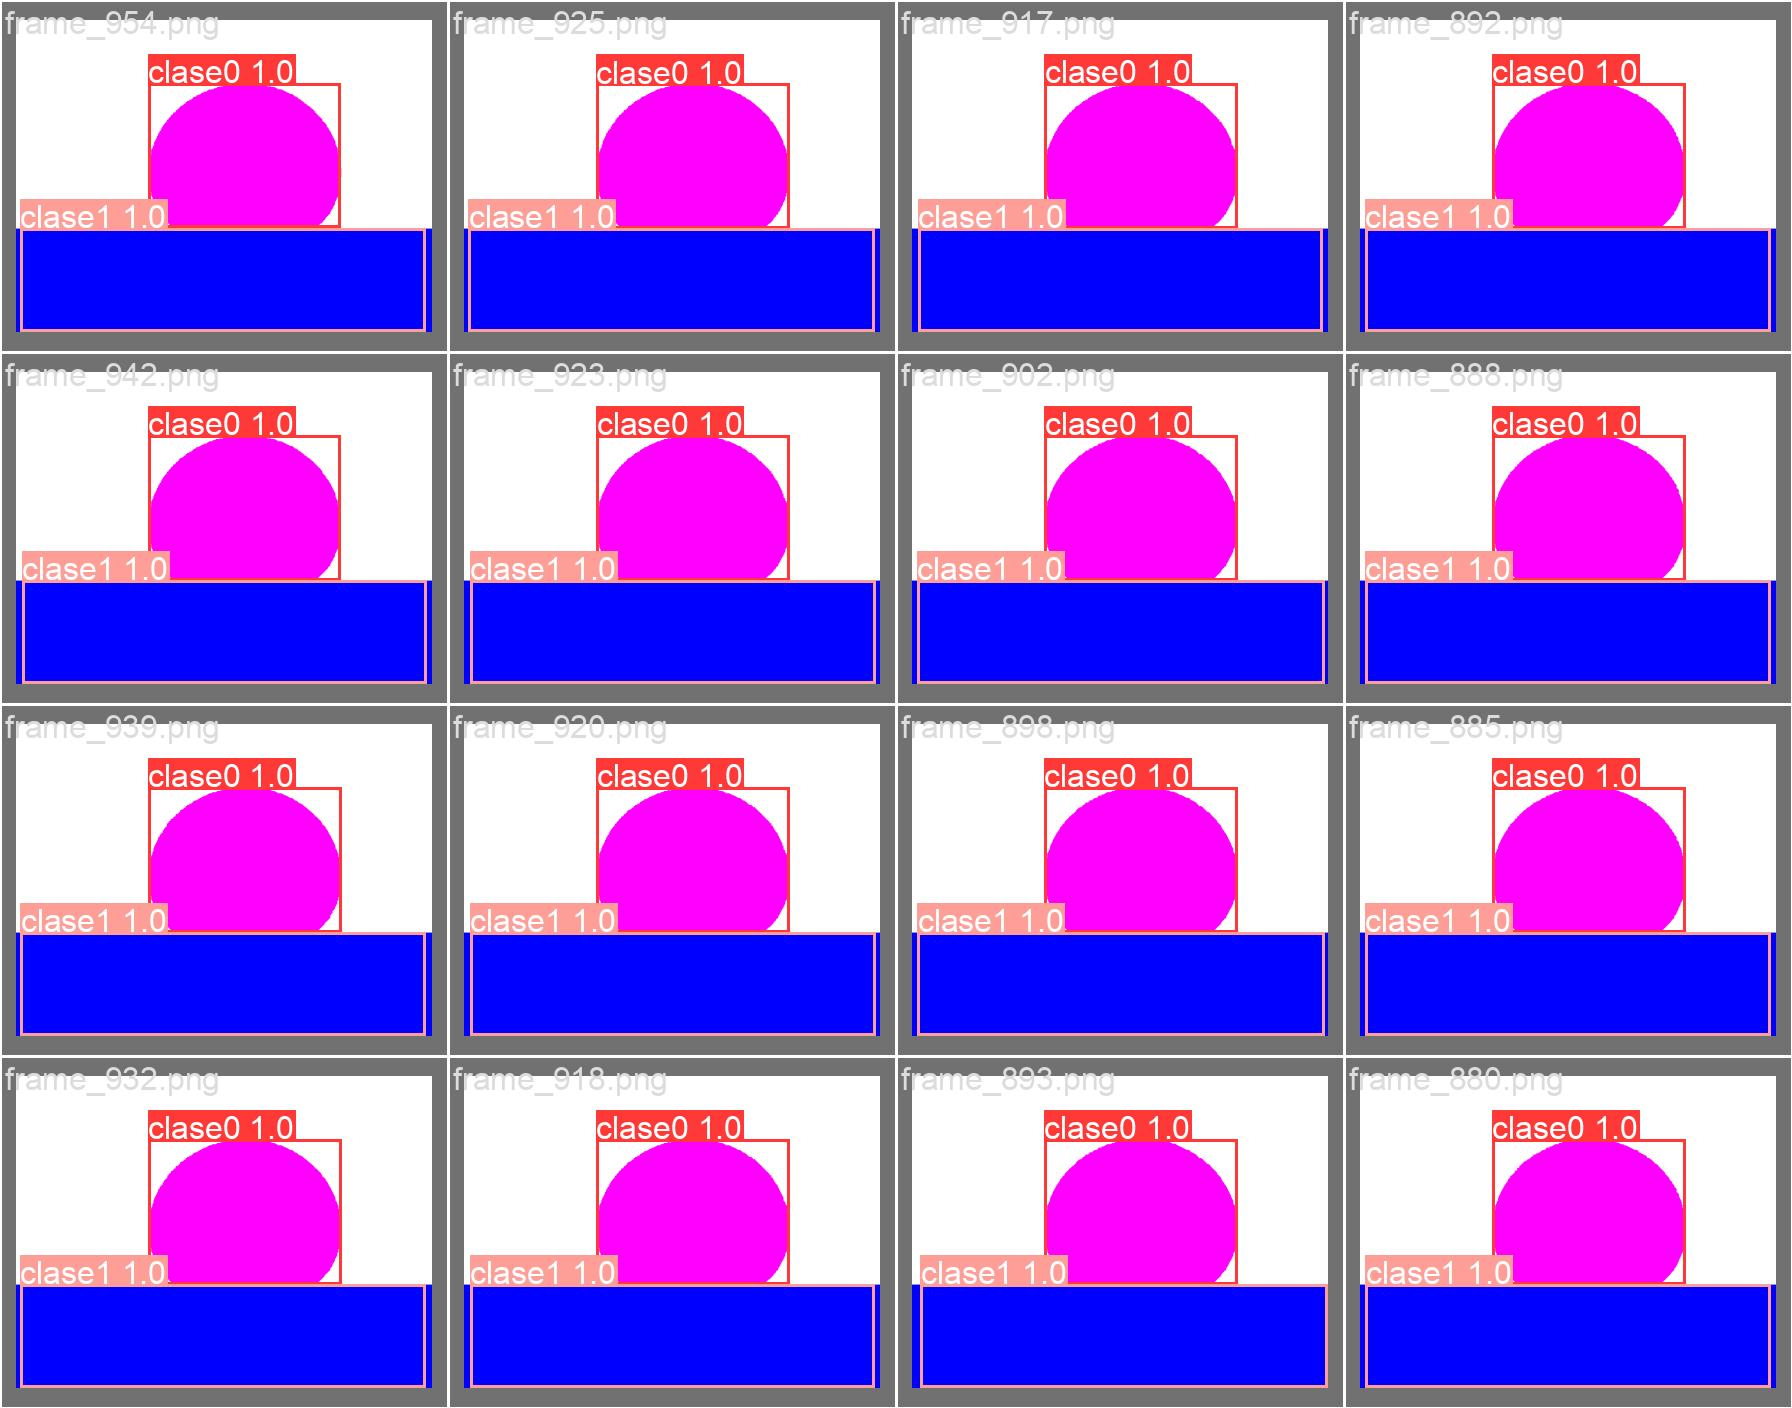

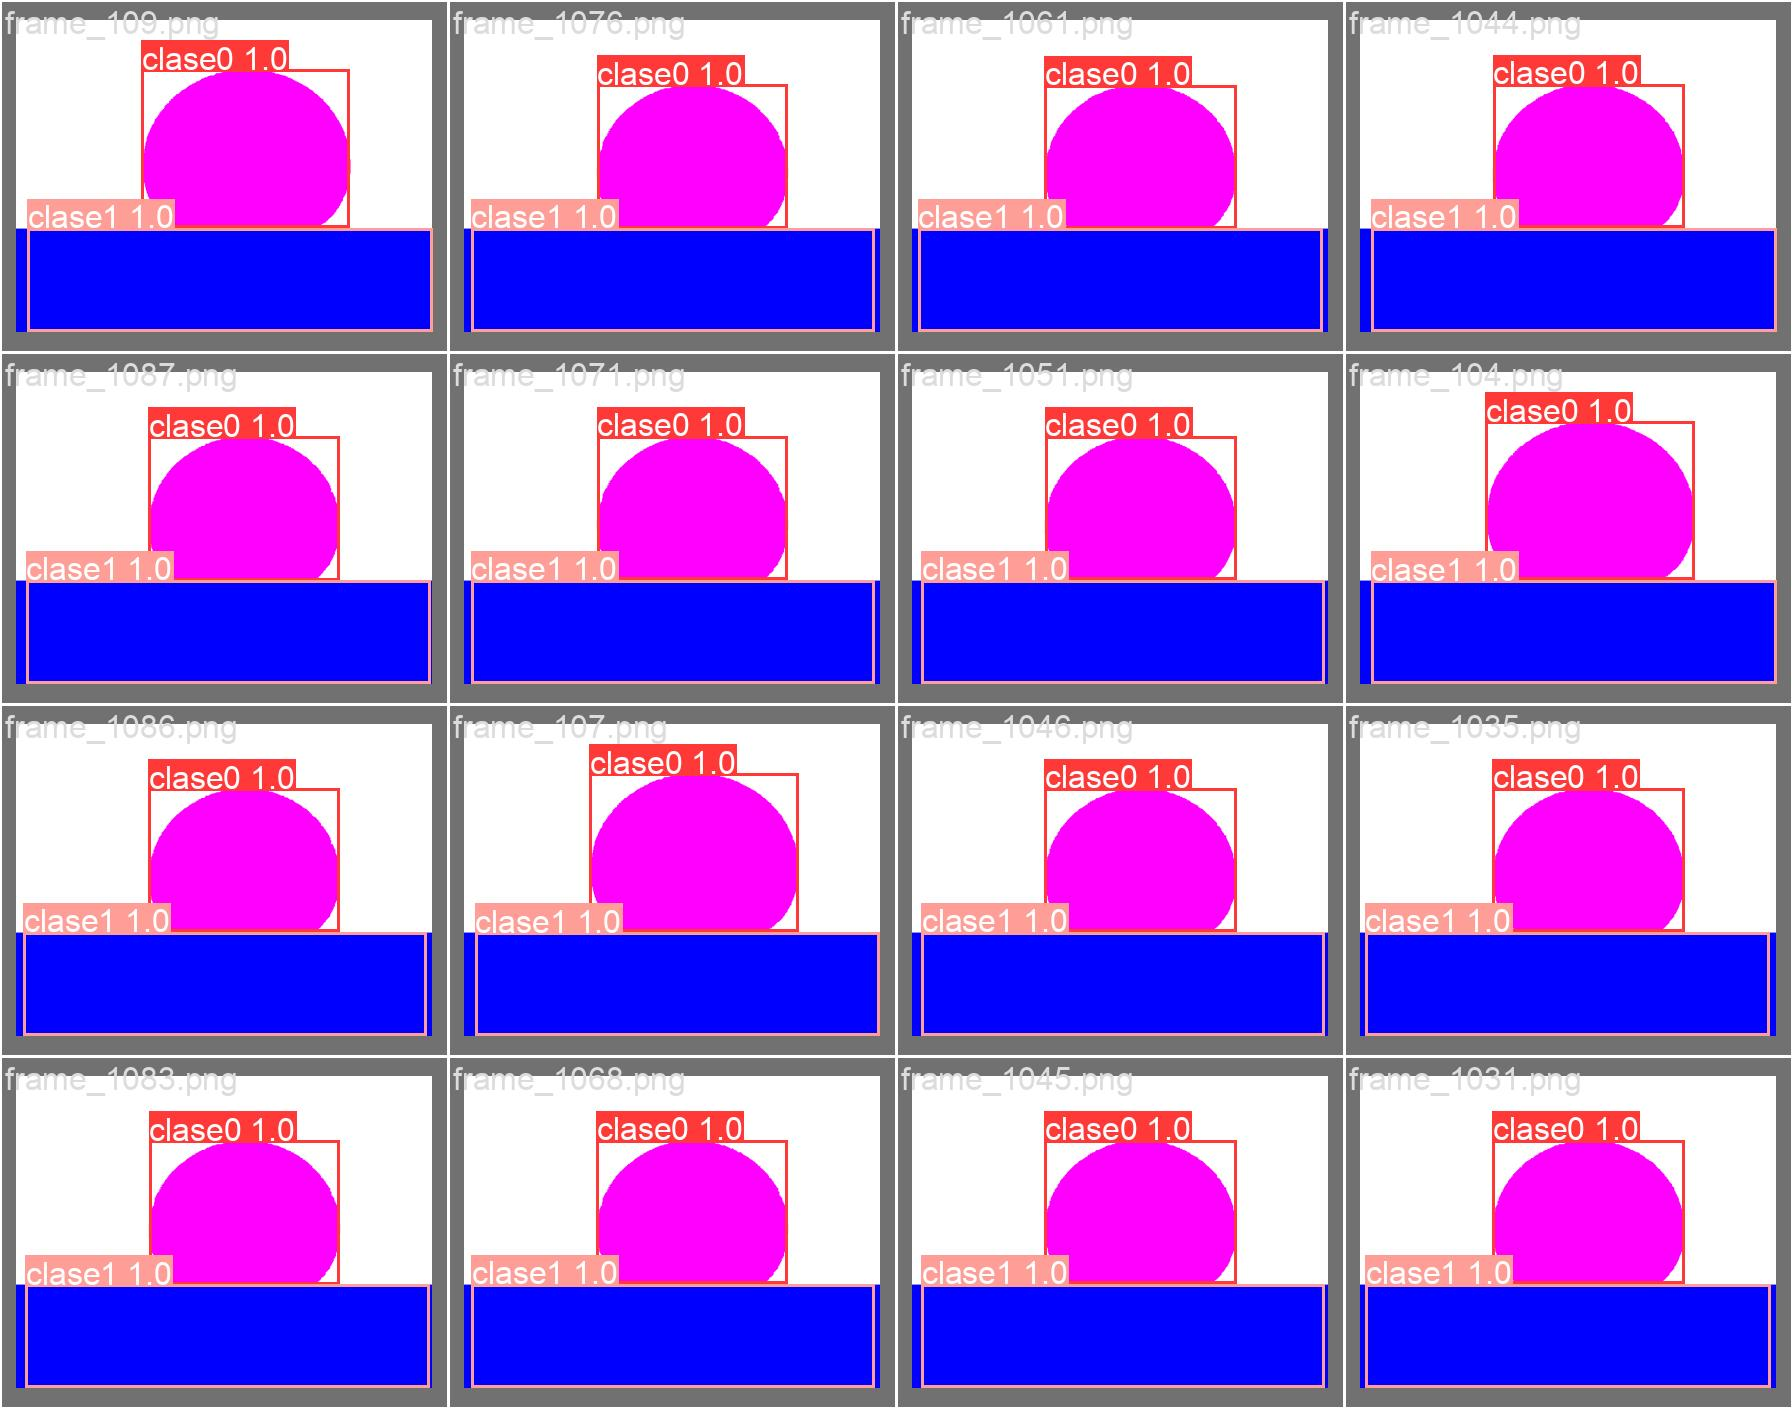

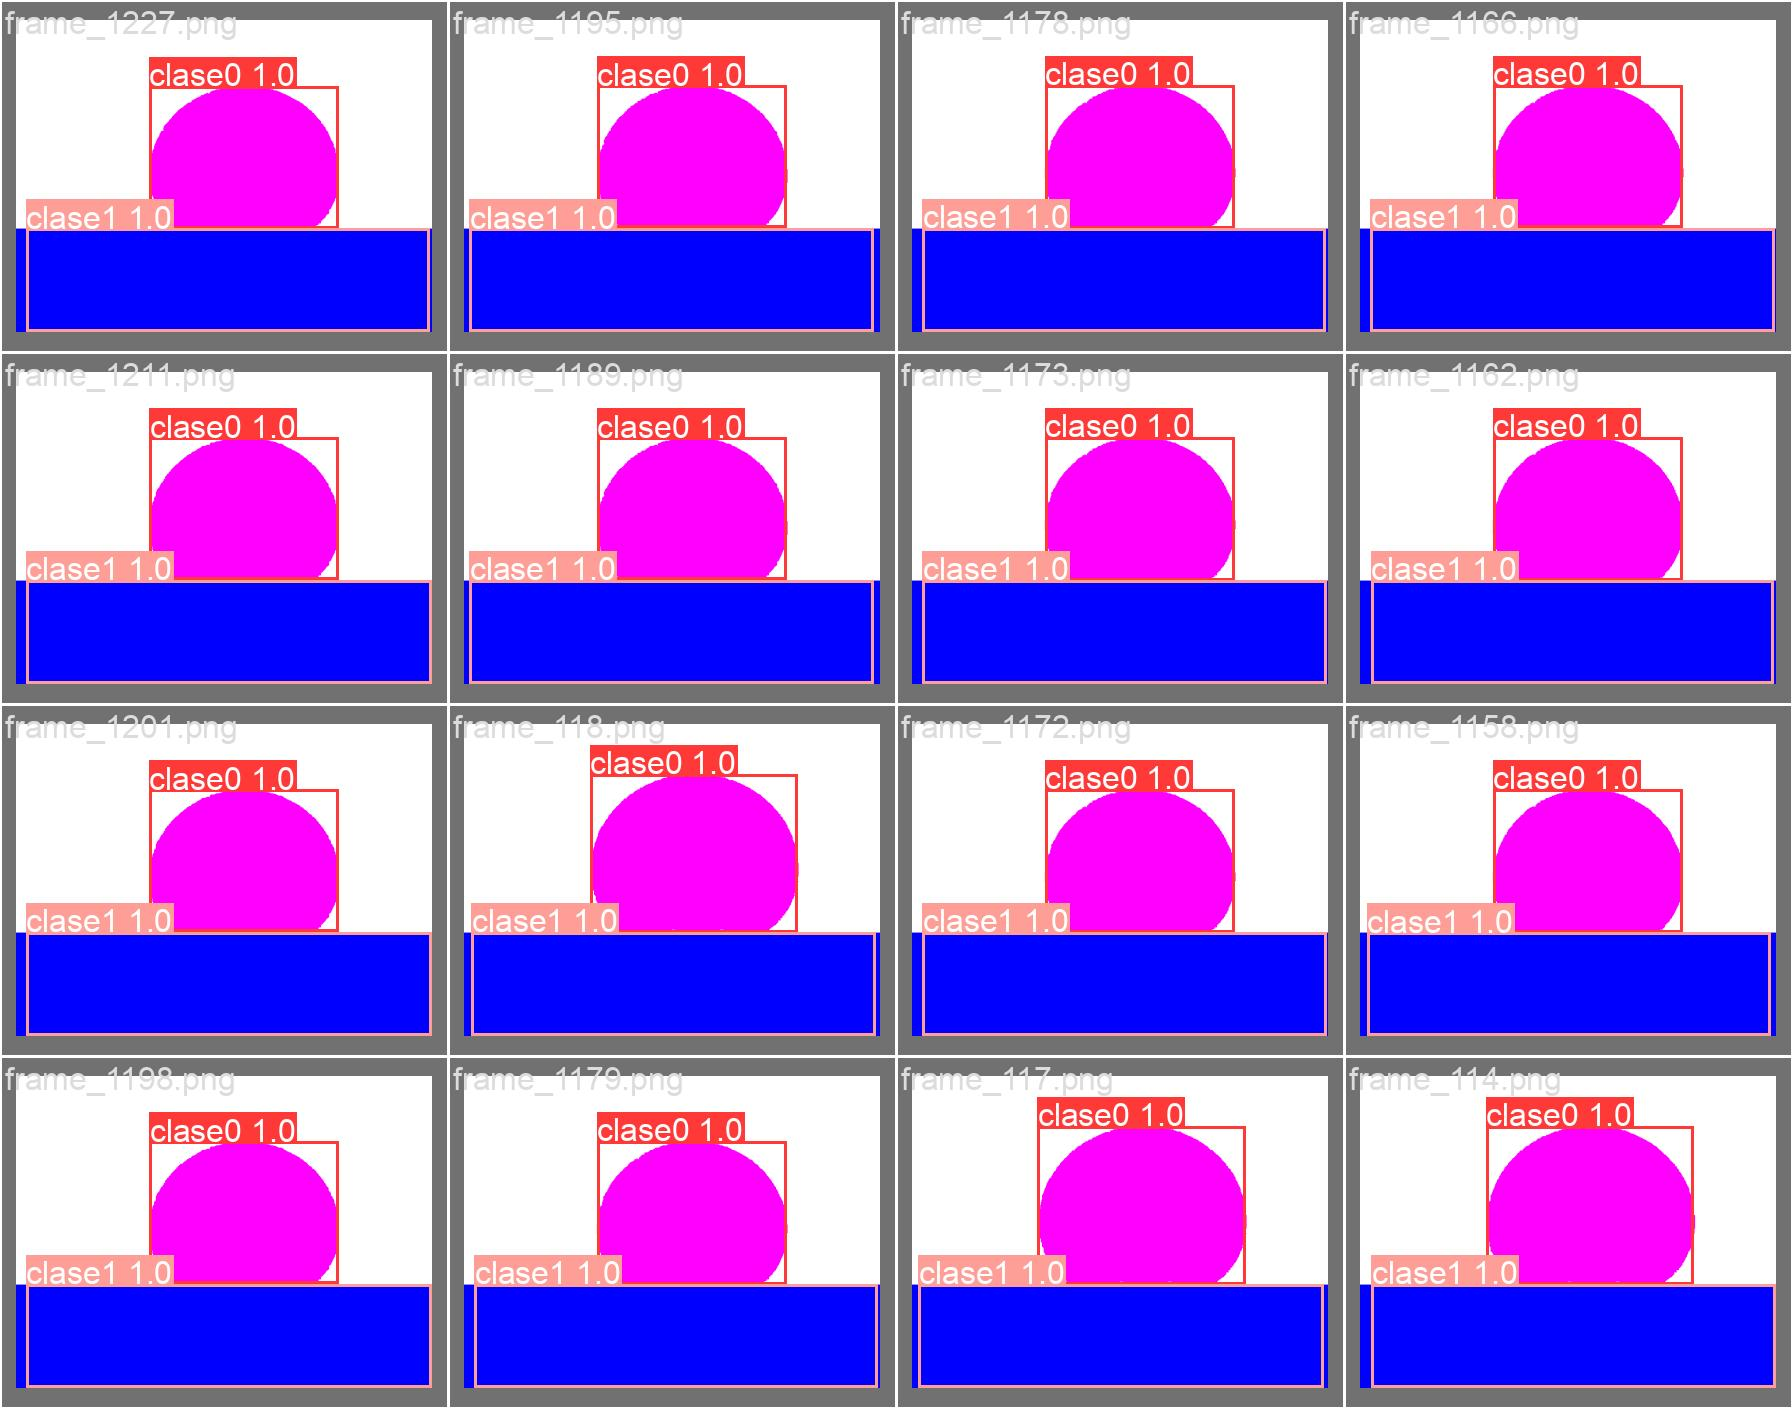

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.058398,0.031911,0.010710,0.70764,1,0.99468,0.61810,0.031071,0.010181,0.001150,0.070120,0.003320,0.003320
1,1,0.037887,0.022404,0.002053,0.94813,1,0.99487,0.68361,0.022264,0.008286,0.001199,0.039988,0.006522,0.006522
2,2,0.032755,0.019393,0.001981,0.99983,1,0.99500,0.77763,0.014784,0.007173,0.000959,0.009725,0.009591,0.009591
3,3,0.026853,0.017956,0.001518,0.99991,1,0.99500,0.92362,0.007616,0.006112,0.000795,0.009406,0.009406,0.009406
4,4,0.022530,0.016917,0.001082,0.99982,1,0.99500,0.89339,0.009400,0.008343,0.000781,0.009406,0.009406,0.009406
5,5,0.020009,0.016223,0.000881,0.99986,1,0.99500,0.89595,0.007295,0.005452,0.000549,0.009208,0.009208,0.009208
6,6,0.017879,0.015436,0.000854,0.99987,1,0.99500,0.93494,0.006074,0.005388,0.000371,0.009010,0.009010,0.009010
7,7,0.016704,0.015010,0.000780,0.99988,1,0.99500,0.92431,0.005756,0.006399,0.000301,0.008812,0.008812,0.008812
8,8,0.015692,0.014453,0.000718,0.99986,1,0.99500,0.91661,0.009401,0.004414,0.000500,0.008614,0.008614,0.008614
9,9,0.014824,0.014054,0.000609,0.99983,1,0.99500,0.95377,0.004926,0.004706,0.000446,0.008416,0.008416,0.008416


In [25]:
from IPython.display import Image, display
import pandas as pd

path = 'runs/train/gotas_yolo/'

display(Image(filename=path + 'results.png', width=1000))

display(Image(filename=path + 'PR_curve.png', width=600))
display(Image(filename=path + 'P_curve.png', width=600))
display(Image(filename=path + 'R_curve.png', width=600))
display(Image(filename=path + 'F1_curve.png', width=600))

display(Image(filename=path + 'confusion_matrix.png', width=600))

display(Image(filename=path + 'val_batch0_pred.jpg', width=700))
display(Image(filename=path + 'val_batch1_pred.jpg', width=700))
display(Image(filename=path + 'val_batch2_pred.jpg', width=700))

df = pd.read_csv(path + 'results.csv')
pd.set_option('display.max_rows', None)
display(df)
